<a href="https://colab.research.google.com/github/LAGISHETTYNANDITHA/aiml-2024/blob/main/Tomato_Leaf_Disease_Prediction_using_VGG16_and_CNN%20AND%20TRANSFER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd

In [2]:
image_size = [224, 224]

In [3]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [9]:
from glob import glob
folders = glob('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*')

In [10]:
folders

['/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy']

In [11]:
x = Flatten()(vgg.output)

In [12]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [13]:
model = Model(inputs = vgg.input, outputs = prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [18]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [19]:
train_set = train_data_gen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 3625 images belonging to 10 classes.


In [20]:
test_set = test_data_gen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid/', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


Text(0.5, 1.0, 'Bacterial Spot')

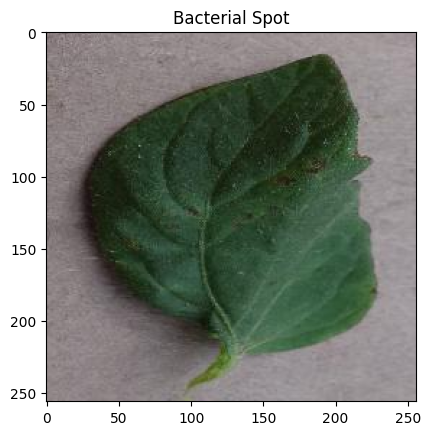

In [21]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid/Tomato___Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG"))
plt.title("Bacterial Spot")

In [22]:
mod = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

<ipython-input-22-823b05d63134>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mod = model.fit_generator(


Epoch 1/20
114/114 [==============================] - 1957s 17s/step - loss: 0.1030 - accuracy: 0.9545 - val_loss: 31.8907 - val_accuracy: 0.2000
Epoch 2/20
114/114 [==============================] - 87s 761ms/step - loss: 0.0197 - accuracy: 0.9950 - val_loss: 31.8304 - val_accuracy: 0.2039
Epoch 3/20
114/114 [==============================] - 86s 753ms/step - loss: 0.0132 - accuracy: 0.9967 - val_loss: 31.8528 - val_accuracy: 0.2035
Epoch 4/20
114/114 [==============================] - 85s 750ms/step - loss: 0.0085 - accuracy: 0.9981 - val_loss: 32.0128 - val_accuracy: 0.2041
Epoch 5/20
114/114 [==============================] - 86s 755ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 32.2144 - val_accuracy: 0.2039
Epoch 6/20
114/114 [==============================] - 86s 760ms/step - loss: 0.0043 - accuracy: 0.9997 - val_loss: 32.0868 - val_accuracy: 0.2041
Epoch 7/20
114/114 [==============================] - 87s 764ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 32.0012 -

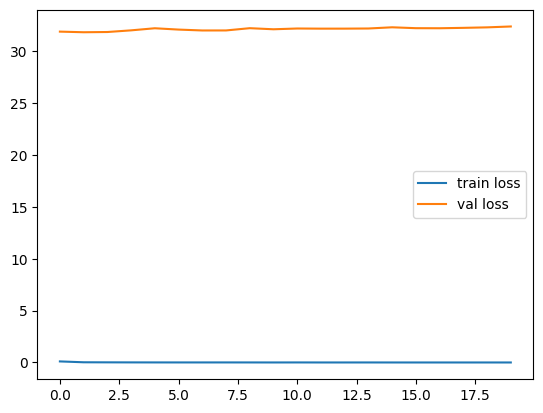

In [23]:
import matplotlib.pyplot as plt
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

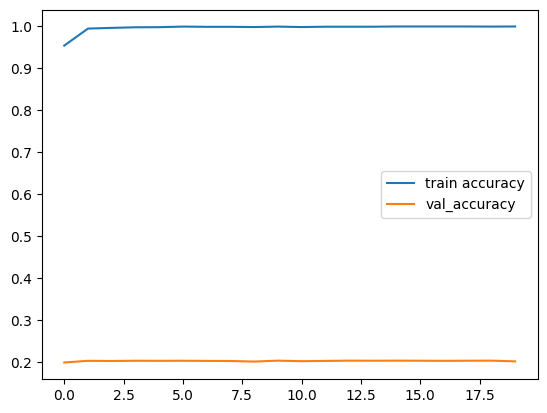

In [24]:
plt.plot(mod.history['accuracy'], label='train accuracy')
plt.plot(mod.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()